In [2]:
import h2o
h2o.connect(url='http://localhost:54321')

Connecting to H2O server at http://localhost:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,4 mins 28 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,"1 year, 11 months and 3 days"
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.713 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

### Load and prepare data

In [3]:
import pandas as pd

df = pd.read_csv('/home/pawel/projects/systemy_inteligentne/data/bank_transactions_data_2.csv')

In [4]:


keep_cols = ['TransactionAmount', 'TransactionType', 'Location', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts']

df = df.query('Channel == "ATM"')[keep_cols]

In [5]:
df

,TransactionAmount,TransactionType,Location,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts
0,14.09,Debit,San Diego,70,Doctor,81,1
1,376.24,Debit,Houston,68,Doctor,141,1
5,92.15,Debit,Oklahoma City,18,Student,172,1
6,7.08,Credit,Seattle,37,Doctor,139,1
9,815.96,Debit,Nashville,55,Doctor,120,1
...,...,...,...,...,...,...,...
2495,271.22,Credit,Louisville,45,Doctor,87,1
2497,348.17,Debit,El Paso,21,Student,181,1
2500,325.60,Debit,Dallas,69,Doctor,88,1
2503,270.25,Debit,Tucson,31,Engineer,42,1


In [6]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
h2o_df

TransactionAmount,TransactionType,Location,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts
14.09,Debit,San Diego,70,Doctor,81,1
376.24,Debit,Houston,68,Doctor,141,1
92.15,Debit,Oklahoma City,18,Student,172,1
7.08,Credit,Seattle,37,Doctor,139,1
815.96,Debit,Nashville,55,Doctor,120,1
781.76,Debit,Memphis,26,Student,123,1
465.45,Debit,Denver,36,Engineer,129,1
246.93,Debit,Miami,23,Student,158,5
59.12,Debit,Baltimore,29,Doctor,257,1
396.45,Debit,New York,49,Engineer,168,3


### Isolation Forest Training

In [7]:
from h2o.estimators import H2OIsolationForestEstimator
# Generate sample data
#hf = h2o.create_frame(rows=1000, cols=10, real_fraction=1.0, missing_fraction=0.1, seed=1234)

# Train an Isolation Forest model
model = H2OIsolationForestEstimator(ntrees=100, contamination=0.05)
model.train(training_frame=h2o_df)

isolationforest Model Build progress: |

██████████████████████████████████████████| (done) 100%


Model Details
=============
H2OIsolationForestEstimator : Isolation Forest
Model Key: IsolationForest_model_python_1742230455540_103


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         80211                  8            8            8             20            94            59.12

ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 5.94042827478648
Normalized Anomaly Score: 0.2508815851972432

Scoring History: 
     timestamp            duration    number_of_trees    mean_tree_path_length    mean_anomaly_score
---  -------------------  ----------  -----------------  -----------------------  --------------------
     2025-03-17 18:10:12  0.011 sec   0.0                nan                      nan
     2025-03-17 18:10:12  0.045 sec   1.0                5.826161790017212        0.23476764199655747
     2025-03-17 18:10:12  0.070 sec   2.0                6.176315789473684        0.16473684210526307
     2025-03-17 18:10:12  0.090 sec   3.0                5.809023485784922        0.23819530284301585
     2025-03-17 18:10:12  0.106 sec   4.0                5.985909822866348        0.2704240472356421
     2025-03-17 18:10:12  0.122 sec   5.0                5.942559165663861        0.2782739037726688
     2025-03-17 18:10:12  0.136 sec   6.0                5.884593837535014        0.30420168067226894
     2025-03-17 18:10:12  0.154 sec   7.0                5.823700908935002        0.3049664310168512
     2025-03-17 18:10:12  0.171 sec   8.0                5.829573257874576        0.2926066855313555
     2025-03-17 18:10:12  0.191 sec   9.0                5.63098916946259         0.34306355984353515
---  ---                  ---         ---                ---                      ---
     2025-03-17 18:10:15  2.748 sec   91.0               5.920353657055007        0.25116894909431264
     2025-03-17 18:10:15  2.790 sec   92.0               5.918926923476108        0.253358876967762
     2025-03-17 18:10:15  2.827 sec   93.0               5.924101121789561        0.2479752095117956
     2025-03-17 18:10:15  2.867 sec   94.0               5.924469405278577        0.25045398138097247
     2025-03-17 18:10:15  2.902 sec   95.0               5.922755699217455        0.2492712097943315
     2025-03-17 18:10:15  2.954 sec   96.0               5.929107827116365        0.24802510487479576
     2025-03-17 18:10:15  2.988 sec   97.0               5.9328466599332375       0.25117277327322673
     2025-03-17 18:10:15  3.026 sec   98.0               5.930801681238471        0.2568063788383536
     2025-03-17 18:10:15  3.058 sec   99.0               5.9384674465224          0.2514793194557669
     2025-03-17 18:10:15  3.091 sec   100.0              5.94042827478648         0.2508815851972432
[101 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [8]:
pred = model.predict(h2o_df)

isolationforest prediction progress: |

███████████████████████████████████████████| (done) 100%


In [9]:
pred

predict,score,mean_length
0,0.289362,5.85
0,0.148936,6.18
0,0.276596,5.88
1,0.608511,5.1
0,0.0851064,6.33
0,0.0808511,6.34
0,0.178723,6.11
1,0.655319,4.99
0,0.485106,5.39
0,0.361702,5.68


In [10]:
pred = pred.as_data_frame()

In [16]:
pred

,predict,score,mean_length
0,0,0.289362,5.85
1,0,0.148936,6.18
2,0,0.276596,5.88
3,1,0.608511,5.10
4,0,0.085106,6.33
...,...,...,...
828,0,0.327660,5.76
829,0,0.263830,5.91
830,0,0.182979,6.10
831,0,0.178723,6.11


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df['outlier'] = pred['predict']

In [25]:
df.query('outlier == 1')['Location']

3               Seattle
7                 Miami
29               Dallas
36            Charlotte
80          Kansas City
128         San Antonio
138          Sacramento
142             Detroit
152             Raleigh
160         Kansas City
175          Fort Worth
176             Phoenix
179             Detroit
200              Boston
212             Atlanta
221      Virginia Beach
260        Jacksonville
264             Chicago
274               Miami
278             El Paso
340             Chicago
406              Austin
438        Philadelphia
510             Atlanta
517           Charlotte
526              Dallas
537        Philadelphia
554           Charlotte
560        Indianapolis
576           Baltimore
578           San Diego
598              Tucson
601             Atlanta
612    Colorado Springs
622              Austin
624          Fort Worth
667         Los Angeles
712              Austin
723           Baltimore
729            Columbus
788      Virginia Beach
806             

In [22]:
df.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'outlier'],
      dtype='object')

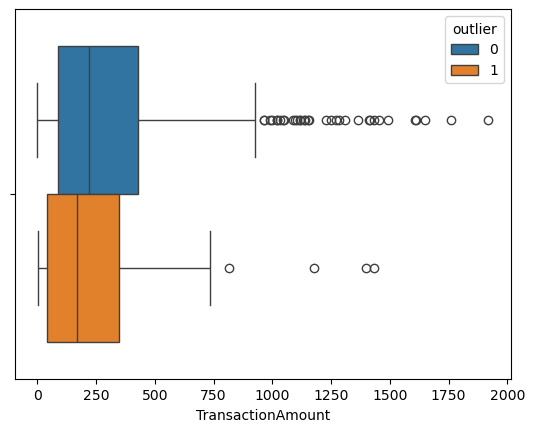

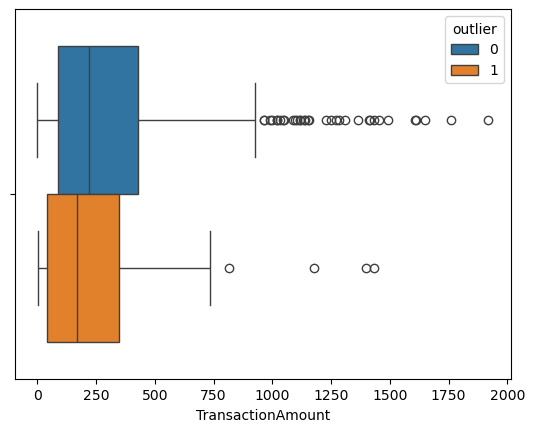

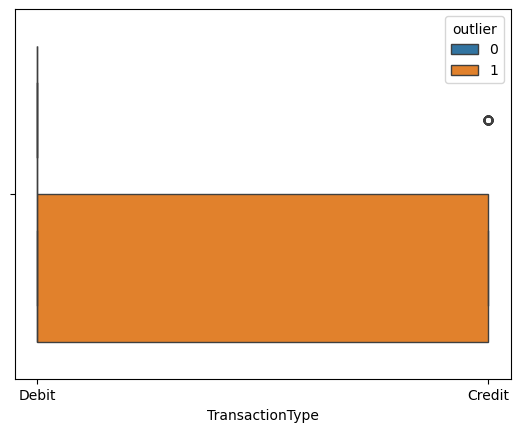

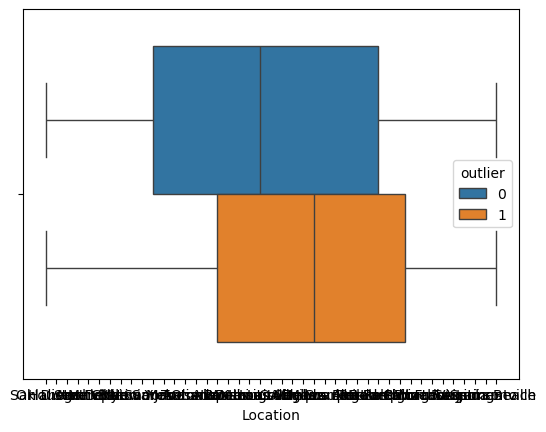

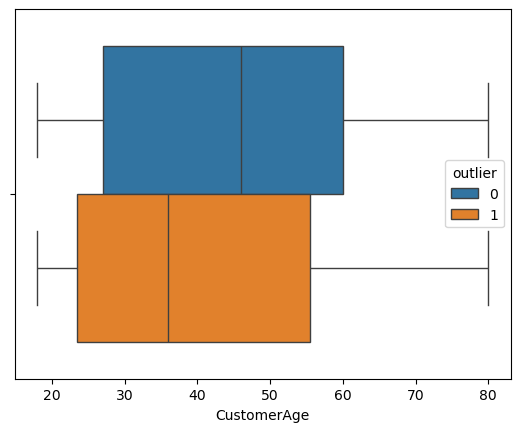

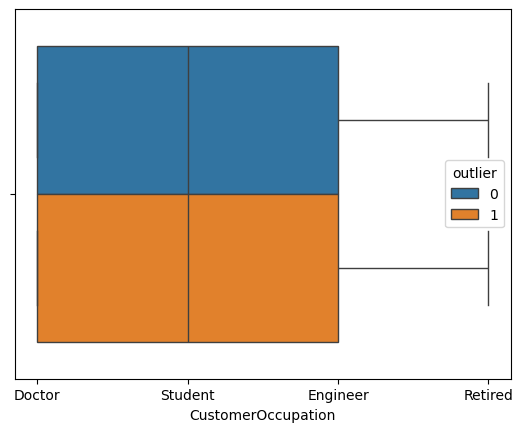

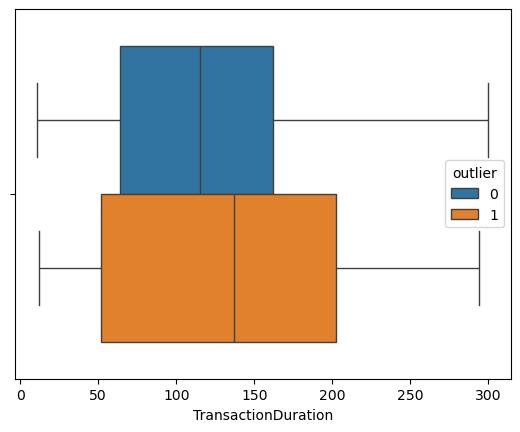

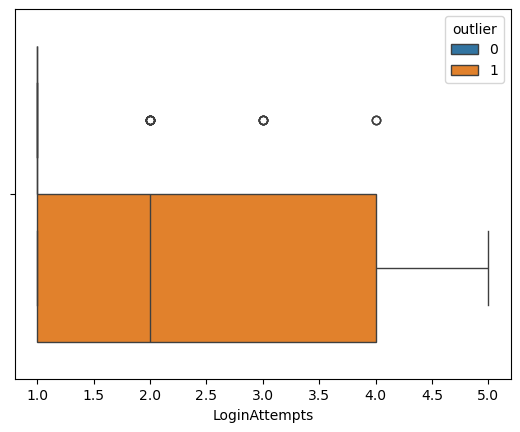

In [23]:
# create a box plot of the df 
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='TransactionAmount', data=df, hue='outlier')
plt.show()

# create grid for box plot for each column of ['TransactionAmount', 'TransactionType', 'Location', 'CustomerAge','CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'outlier'] with hue = 'outlier

for col in ['TransactionAmount', 'TransactionType', 'Location', 'CustomerAge','CustomerOccupation', 'TransactionDuration', 'LoginAttempts']:
    sns.boxplot(x=col, data=df, hue='outlier')
    plt.show()



### MlFlow + save - kolejny zajecia

In [5]:
h2o.connect(url='http://localhost:54321')

Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,10 mins 32 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 days
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.589 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

### Predict

In [ ]:
model_uri = "models:/h2o_isolation_forest_model/1"  # Adjust version as needed
loaded_model = mlflow.h2o.load_model(model_uri)

# Generate new batch of data for prediction
new_data = h2o.create_frame(rows=10, cols=10, real_fraction=1.0, missing_fraction=0.1, seed=5678)

# Make predictions
predictions = loaded_model.predict(new_data)
print(predictions)

### H2O MLFlow integration

In [17]:
import os

os.environ['AWS_ACCESS_KEY_ID'] = 'cXP6S51XS9xwDbw1ins'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'yqpHn3lYRKWTWUeYINZ'

In [19]:
import h2o
from h2o.automl import H2OAutoML
import mlflow
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

h2o.connect(url='http://localhost:54321')
mlflow.set_tracking_uri("http://localhost:5000")
# Set up MLflow experiment
EXPERIMENT_NAME = "h2o_automl_experiment4"
mlflow.set_experiment(EXPERIMENT_NAME)
INCLUDE_ALGORITHMS = ["GBM", "GLM", "XGBoost"]

def load_data():
    """
    Load and prepare your dataset. Replace this with your data loading logic.
    Returns train, valid, test splits as H2O frames.
    """
    # Sample data loading - replace with your actual data
    # For this example, we'll use the iris dataset from H2O
    data = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris.csv")
    data.columns = ['width', 'length', 'height', 'diameter', 'type']
    
    # Split the data
    splits = data.split_frame(ratios=[0.7, 0.15], seed=42)
    train = splits[0]
    valid = splits[1]
    test = splits[2]
    
    return train, valid, test

def run_automl_experiment(train, valid, target_col, predictors, experiment_name, max_models=20, max_runtime_secs=600):
    """
    Run H2O AutoML experiment with MLflow tracking
    
    Args:
        train: H2O Frame for training
        valid: H2O Frame for validation
        target_col: Target column name
        predictors: List of predictor column names
        experiment_name: Name for the MLflow experiment
        max_models: Maximum number of models to train
        max_runtime_secs: Maximum runtime in seconds
    """
    # Define AutoML parameters
    automl_params = {
        "max_models": max_models,
        "max_runtime_secs": max_runtime_secs,
        "seed": 42,
        "balance_classes": True,
        "sort_metric": "AUTO",
        "include_algos": INCLUDE_ALGORITHMS,
    }
    
    # Start an MLflow run
    with mlflow.start_run(run_name=f"h2o_automl_{experiment_name}"):
        # Log parameters
        mlflow.log_params({
            "target_column": target_col,
            "predictors": predictors,
            "max_models": max_models,
            "max_runtime_secs": max_runtime_secs,
            "include_algorithms": "AUTO"
        })
        
        # Initialize and run AutoML
        aml = H2OAutoML(**automl_params)
        aml.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)
        
        # Get the leaderboard
        lb = aml.leaderboard
        print(lb.head())
        
        # Get the best model
        best_model = aml.leader
        
        # Log model performance metrics from H2O
        model_metrics = best_model.model_performance(valid)
        
        # Log different metrics based on problem type (classification or regression)
        if best_model.type == "classifier":
            mlflow.log_metric("accuracy", model_metrics.accuracy()[0][1])
            mlflow.log_metric("auc", model_metrics.auc())
            mlflow.log_metric("f1", model_metrics.F1())
            mlflow.log_metric("precision", model_metrics.precision()[0][1])
            mlflow.log_metric("recall", model_metrics.recall()[0][1])
            mlflow.log_metric("logloss", model_metrics.logloss())
        else:  # regression
            mlflow.log_metric("rmse", model_metrics.rmse())
            mlflow.log_metric("r2", model_metrics.r2())
            mlflow.log_metric("mse", model_metrics.mse())
        
        # Log the model type and additional info
        mlflow.log_param("best_model_type", best_model.__class__.__name__)
        
        # Log all models in the leaderboard with their metrics
        leaderboard_df = lb.as_data_frame()
        for i, (idx, row) in enumerate(leaderboard_df.iterrows()):
            if i >= 10:  # Limit to top 10 models to avoid clutter
                break
            
            with mlflow.start_run(run_name=f"model_{row['model_id']}", nested=True):
                for col in leaderboard_df.columns:
                    if col != "model_id":
                        mlflow.log_metric(col, row[col])
                mlflow.log_param("model_id", row['model_id'])
        
        # Save model ID for downstream use
        return best_model, leaderboard_df

def evaluate_model(model, test_data, target_col):
    """
    Evaluate the model on the test set and log additional metrics
    """
    with mlflow.start_run(run_name="model_evaluation", nested=True):
        # Make predictions
        preds = model.predict(test_data)
        
        # Extract test data and predictions as pandas DataFrames
        test_df = test_data.as_data_frame()
        preds_df = preds.as_data_frame()
        
        # Log test performance metrics
        test_metrics = model.model_performance(test_data)
        
        if model.type == "classifier":
            mlflow.log_metric("test_accuracy", test_metrics.accuracy()[0][1])
            mlflow.log_metric("test_auc", test_metrics.auc())
            mlflow.log_metric("test_f1", test_metrics.F1())
            
            # Create and log confusion matrix as artifact
            cm = test_metrics.confusion_matrix().as_data_frame()
            cm.to_csv("confusion_matrix.csv", index=False)
            mlflow.log_artifact("confusion_matrix.csv")
        else:  # regression
            mlflow.log_metric("test_rmse", test_metrics.rmse())
            mlflow.log_metric("test_r2", test_metrics.r2())
            
            # Create and log residual plot data
            residuals = test_df[target_col] - preds_df['predict']
            residual_data = pd.DataFrame({
                'actual': test_df[target_col],
                'predicted': preds_df['predict'],
                'residual': residuals
            })
            residual_data.to_csv("residuals.csv", index=False)
            mlflow.log_artifact("residuals.csv")

def main():
    # Define your experiment parameters
    TARGET_COLUMN = "type"  # replace with your target column
    
    # Load data
    train, valid, test = load_data()
    
    # Define predictors (all columns except the target)
    predictors = [col for col in train.columns if col != TARGET_COLUMN]
    
    # Run AutoML experiment
    best_model, leaderboard = run_automl_experiment(
        train=train,
        valid=valid,
        target_col=TARGET_COLUMN,
        predictors=predictors,
        experiment_name="iris_classification",
        max_models=20,
        max_runtime_secs=120  # 5 minutes
    )
    
    # Evaluate the model on test data
    # evaluate_model(best_model, test, TARGET_COLUMN)
    
    # Save the leaderboard as an artifact
    leaderboard.to_csv("automl_leaderboard.csv", index=False)
    with mlflow.start_run(run_name="save_artifacts"):
        mlflow.log_artifact("automl_leaderboard.csv")
    
    # Save the best model using MLflow
    model_path = h2o.save_model(model=best_model, path="./models", force=True)
    with mlflow.start_run(run_name="save_model"):
        mlflow.log_artifact(model_path)
        
    print(f"Experiment completed. Best model: {best_model}")
    print(f"Model saved to: {model_path}")
    print(f"View results in MLflow UI by running: mlflow ui")
    
    # Shut down H2O
    h2o.shutdown()

main()

Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,43 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 days
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.738 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


2025/03/31 18:15:32 INFO mlflow.tracking.fluent: Experiment with name 'h2o_automl_experiment4' does not exist. Creating a new experiment.


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
16:15:36.820: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

██
16:15:40.811: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 107.0.

█████████████████████████████████████████████████████████████| (done) 100%
model_id                                           mean_per_class_error    logloss      rmse        mse
GLM_1_AutoML_1_20250331_161536                                0.0280423   0.075903  0.155434  0.0241596
XGBoost_grid_1_AutoML_1_20250331_161536_model_7               0.0375661   0.190847  0.211316  0.0446544
XGBoost_grid_1_AutoML_1_20250331_161536_model_3               0.03756

/home/pawel/anaconda3/envs/app/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


🏃 View run model_GLM_1_AutoML_1_20250331_161536 at: http://localhost:5000/#/experiments/6/runs/c7814dd910fa472f9198a8bf128bcd5e
🧪 View experiment at: http://localhost:5000/#/experiments/6
🏃 View run model_XGBoost_grid_1_AutoML_1_20250331_161536_model_7 at: http://localhost:5000/#/experiments/6/runs/c93b4c791da1402c9640ad522bb3489a
🧪 View experiment at: http://localhost:5000/#/experiments/6
🏃 View run model_XGBoost_grid_1_AutoML_1_20250331_161536_model_3 at: http://localhost:5000/#/experiments/6/runs/ed51ba52414d412296f5eabeb1a799e2
🧪 View experiment at: http://localhost:5000/#/experiments/6
🏃 View run model_XGBoost_grid_1_AutoML_1_20250331_161536_model_4 at: http://localhost:5000/#/experiments/6/runs/c84e6a379731447989485b44ab1ba1d7
🧪 View experiment at: http://localhost:5000/#/experiments/6
🏃 View run model_GBM_5_AutoML_1_20250331_161536 at: http://localhost:5000/#/experiments/6/runs/950422e436fc4190a400175ee12ffda5
🧪 View experiment at: http://localhost:5000/#/experiments/6
🏃 View ru

S3UploadFailedError: Failed to upload automl_leaderboard.csv to mlflow/6/03160d86130b4bcc8743da943f4ad8d5/artifacts/automl_leaderboard.csv: An error occurred (InvalidAccessKeyId) when calling the PutObject operation: The AWS Access Key Id you provided does not exist in our records.